In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams.update({'font.size':20})
#plt.rcParams["font.family"] = "sans"


import matplotlib.pyplot as plt

# Business Problem

One of the long-lasting business issues in the world of Pharmaceutical companies is the  persistency of drugs which can  significantly affect the outcome of medical treatments. One of the important factors that is related to persistency is the adherence of the patient to the prescribed regimens, meaning if the patient is committed to the prescribed regimens or not. In fact, related studies show that around 50%-60% of the patients with different illnesses in US miss doses, take the wrong doses, or drop off treatment in the first year. 
Additionally, the illness, either chronic or acute can be related to the adherence and persistency of drugs. To solve the problem, we need to find out factors that are the most correlated to the persistence of drugs and adherence. 


# Data set 

In [2]:
dataset = pd.read_csv('Healthcare_dataset.csv')

In [3]:
dataset.tail()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
3421,P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,N,N,Y,N,N,N,N,N,N,1
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
3423,P3424,Non-Persistent,Female,Caucasian,Not Hispanic,South,65-75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [5]:
print ("Rows     : " ,dataset.shape[0])
print ("Columns  : " ,dataset.shape[1])
print ("\nFeatures : \n" ,dataset.columns.tolist())

Rows     :  3424
Columns  :  69

Features : 
 ['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region', 'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag', 'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm', 'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx', 'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment', 'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx', 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms', 'Comorb_Encounter_For_Immunization', 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx', 'Comorb_Vitamin_D_Deficiency', 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified', 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx', 'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia', 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions', 'Comorb_O

In [6]:
dataset.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


In [7]:
#to check if we have missing values 
dataset.isnull().sum()  #Returns the sum of NaN values in each column.#there is no Nan values

Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64

In [8]:
#check if there is any duplication in dataset

print(dataset.duplicated(subset=None, keep='first'))

0       False
1       False
2       False
3       False
4       False
        ...  
3419    False
3420    False
3421    False
3422    False
3423    False
Length: 3424, dtype: bool


In [9]:
null=pd.DataFrame(dataset.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(dataset.isna().sum()/len(dataset)*100)
null = null[null["% Missing Values"] > 0]
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1)


#find out about NULL values in the data 
#There is not any missing or null data

,Null Values,% Missing Values


In [10]:
 dataset.isna().any()

Ptid                              False
Persistency_Flag                  False
Gender                            False
Race                              False
Ethnicity                         False
                                  ...  
Risk_Hysterectomy_Oophorectomy    False
Risk_Estrogen_Deficiency          False
Risk_Immobilization               False
Risk_Recurring_Falls              False
Count_Of_Risks                    False
Length: 69, dtype: bool

In [11]:
#is there any correlation between features ? 
describeNum = dataset.describe(include =['float64', 'int64', 'object'])
describeNum.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)
#why we have so many Nans ?


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ptid,3424,3424,P1,1,nan,nan,nan,nan,nan,nan,nan
Persistency_Flag,3424,2,Non-Persistent,2135,nan,nan,nan,nan,nan,nan,nan
Gender,3424,2,Female,3230,nan,nan,nan,nan,nan,nan,nan
Race,3424,4,Caucasian,3148,nan,nan,nan,nan,nan,nan,nan
Ethnicity,3424,3,Not Hispanic,3235,nan,nan,nan,nan,nan,nan,nan
Region,3424,5,Midwest,1383,nan,nan,nan,nan,nan,nan,nan
Age_Bucket,3424,4,>75,1439,nan,nan,nan,nan,nan,nan,nan
Ntm_Speciality,3424,36,GENERAL PRACTITIONER,1535,nan,nan,nan,nan,nan,nan,nan
Ntm_Specialist_Flag,3424,2,Others,2013,nan,nan,nan,nan,nan,nan,nan
Ntm_Speciality_Bucket,3424,3,OB/GYN/Others/PCP/Unknown,2104,nan,nan,nan,nan,nan,nan,nan


In [12]:
for col in dataset: #print the unique of each column
    print("column_name:",col,"---unique:", dataset[col].unique())

column_name: Ptid ---unique: ['P1' 'P2' 'P3' ... 'P3422' 'P3423' 'P3424']
column_name: Persistency_Flag ---unique: ['Persistent' 'Non-Persistent']
column_name: Gender ---unique: ['Male' 'Female']
column_name: Race ---unique: ['Caucasian' 'Asian' 'Other/Unknown' 'African American']
column_name: Ethnicity ---unique: ['Not Hispanic' 'Hispanic' 'Unknown']
column_name: Region ---unique: ['West' 'Midwest' 'South' 'Other/Unknown' 'Northeast']
column_name: Age_Bucket ---unique: ['>75' '55-65' '65-75' '<55']
column_name: Ntm_Speciality ---unique: ['GENERAL PRACTITIONER' 'Unknown' 'ENDOCRINOLOGY' 'RHEUMATOLOGY'
 'ONCOLOGY' 'PATHOLOGY' 'OBSTETRICS AND GYNECOLOGY'
 'PSYCHIATRY AND NEUROLOGY' 'ORTHOPEDIC SURGERY'
 'PHYSICAL MEDICINE AND REHABILITATION' 'SURGERY AND SURGICAL SPECIALTIES'
 'PEDIATRICS' 'PULMONARY MEDICINE' 'HEMATOLOGY & ONCOLOGY' 'UROLOGY'
 'PAIN MEDICINE' 'NEUROLOGY' 'RADIOLOGY' 'GASTROENTEROLOGY'
 'EMERGENCY MEDICINE' 'PODIATRY' 'OPHTHALMOLOGY' 'OCCUPATIONAL MEDICINE'
 'TRANSPLANT 

# Exploratory Data analysis

In [13]:
#the objective is to understand how the persistency_flag variable is related to other variables 
#and what columns are important and what columns are not


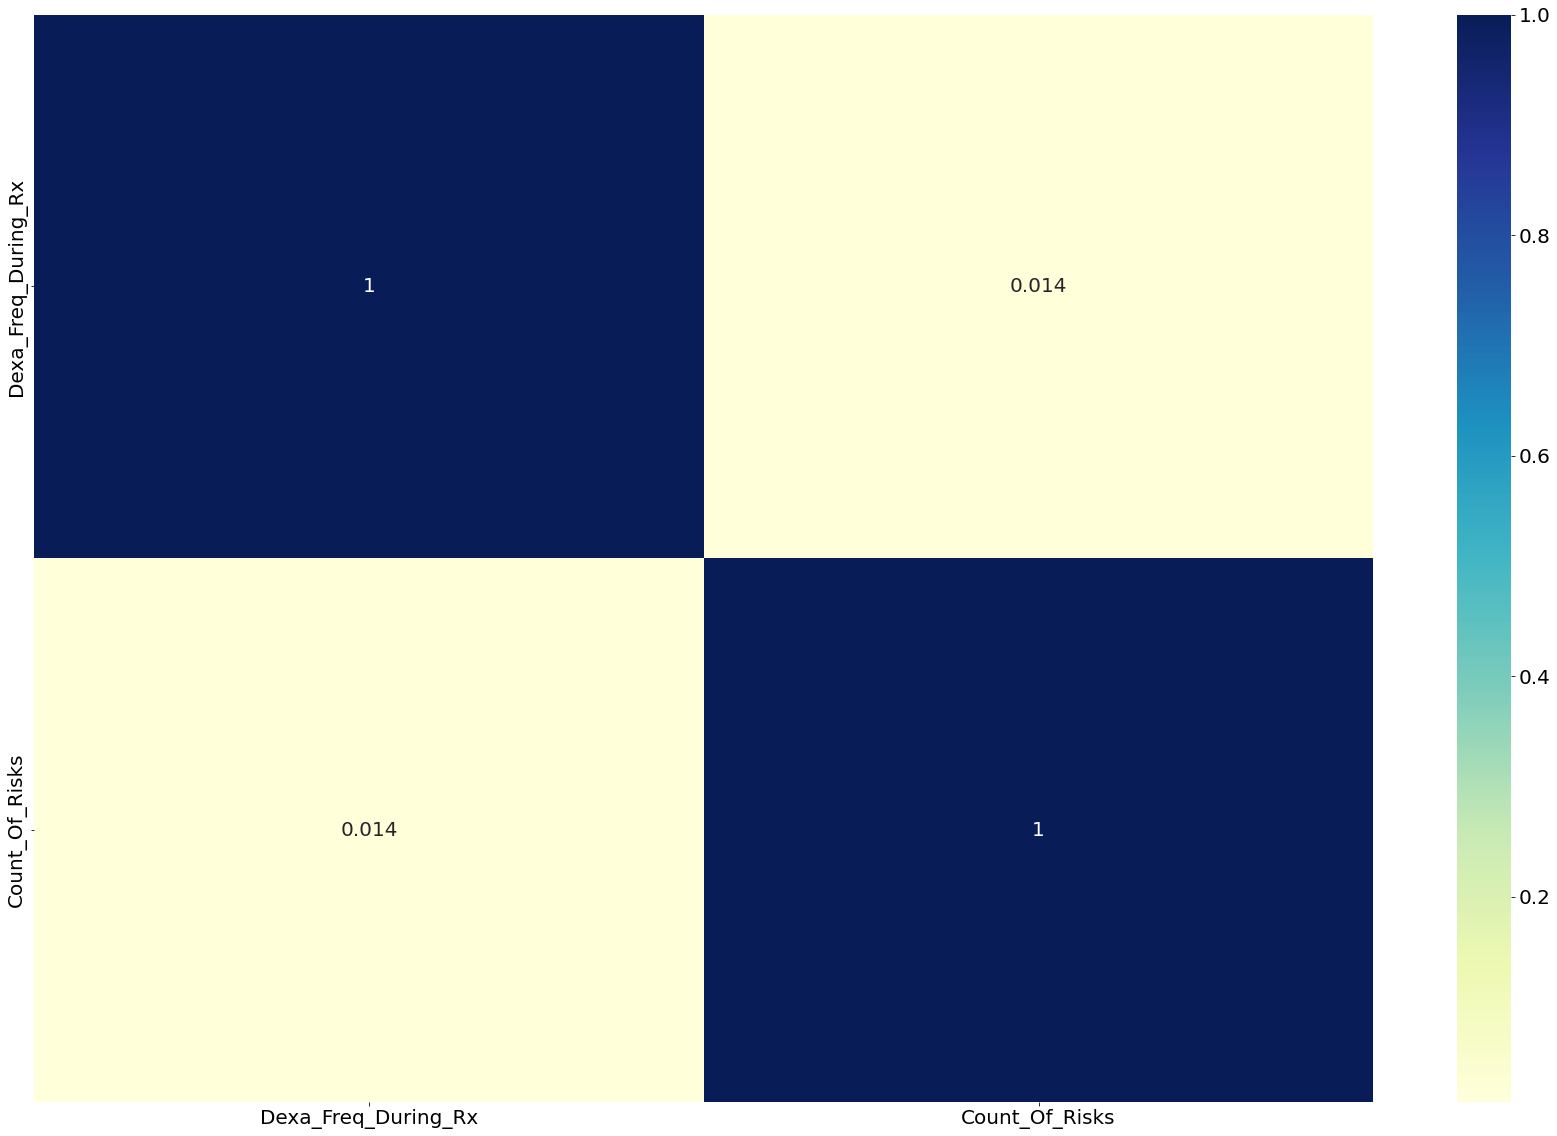

In [14]:
#It is important to realize which columns to drop and which columns to not drop. For that we need to find correlation


plt.figure(figsize=(30,20))
ax = sns.heatmap(data = dataset.corr(),cmap='YlGnBu',annot=True)

#bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5,top - 0.5)

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seab

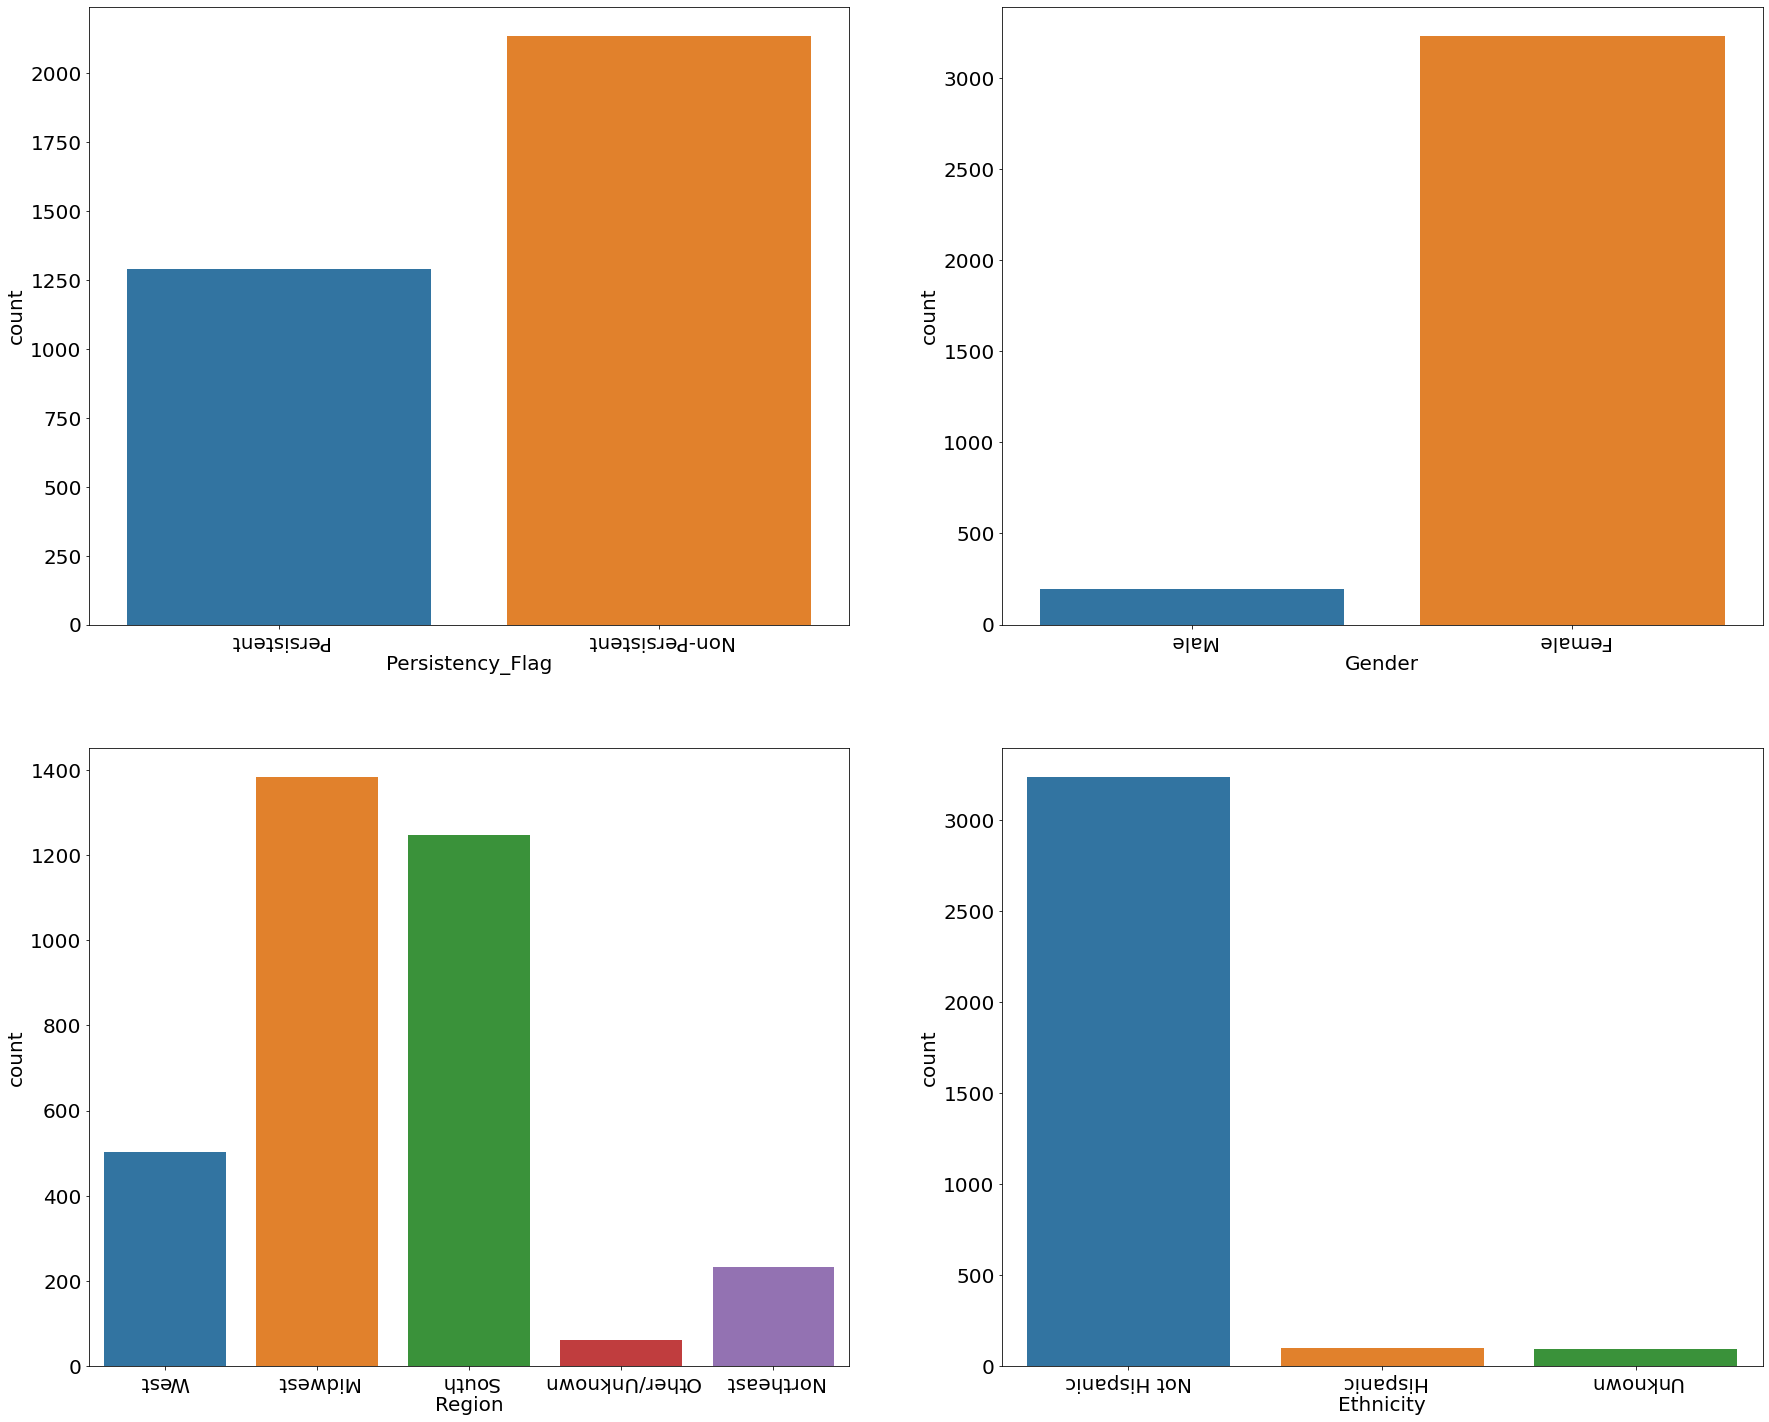

In [34]:
Categorical1 = ['Persistency_Flag','Gender', 'Region','Ethnicity' ]


fig, ax = plt.subplots(2, 2, figsize=(30,25))
for variable, subplot in zip(Categorical1, ax.flatten()):
    sns.countplot(dataset[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(180)
        
#the number of non persistent drugs and Female participants is higher in this dataset.
#

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seab

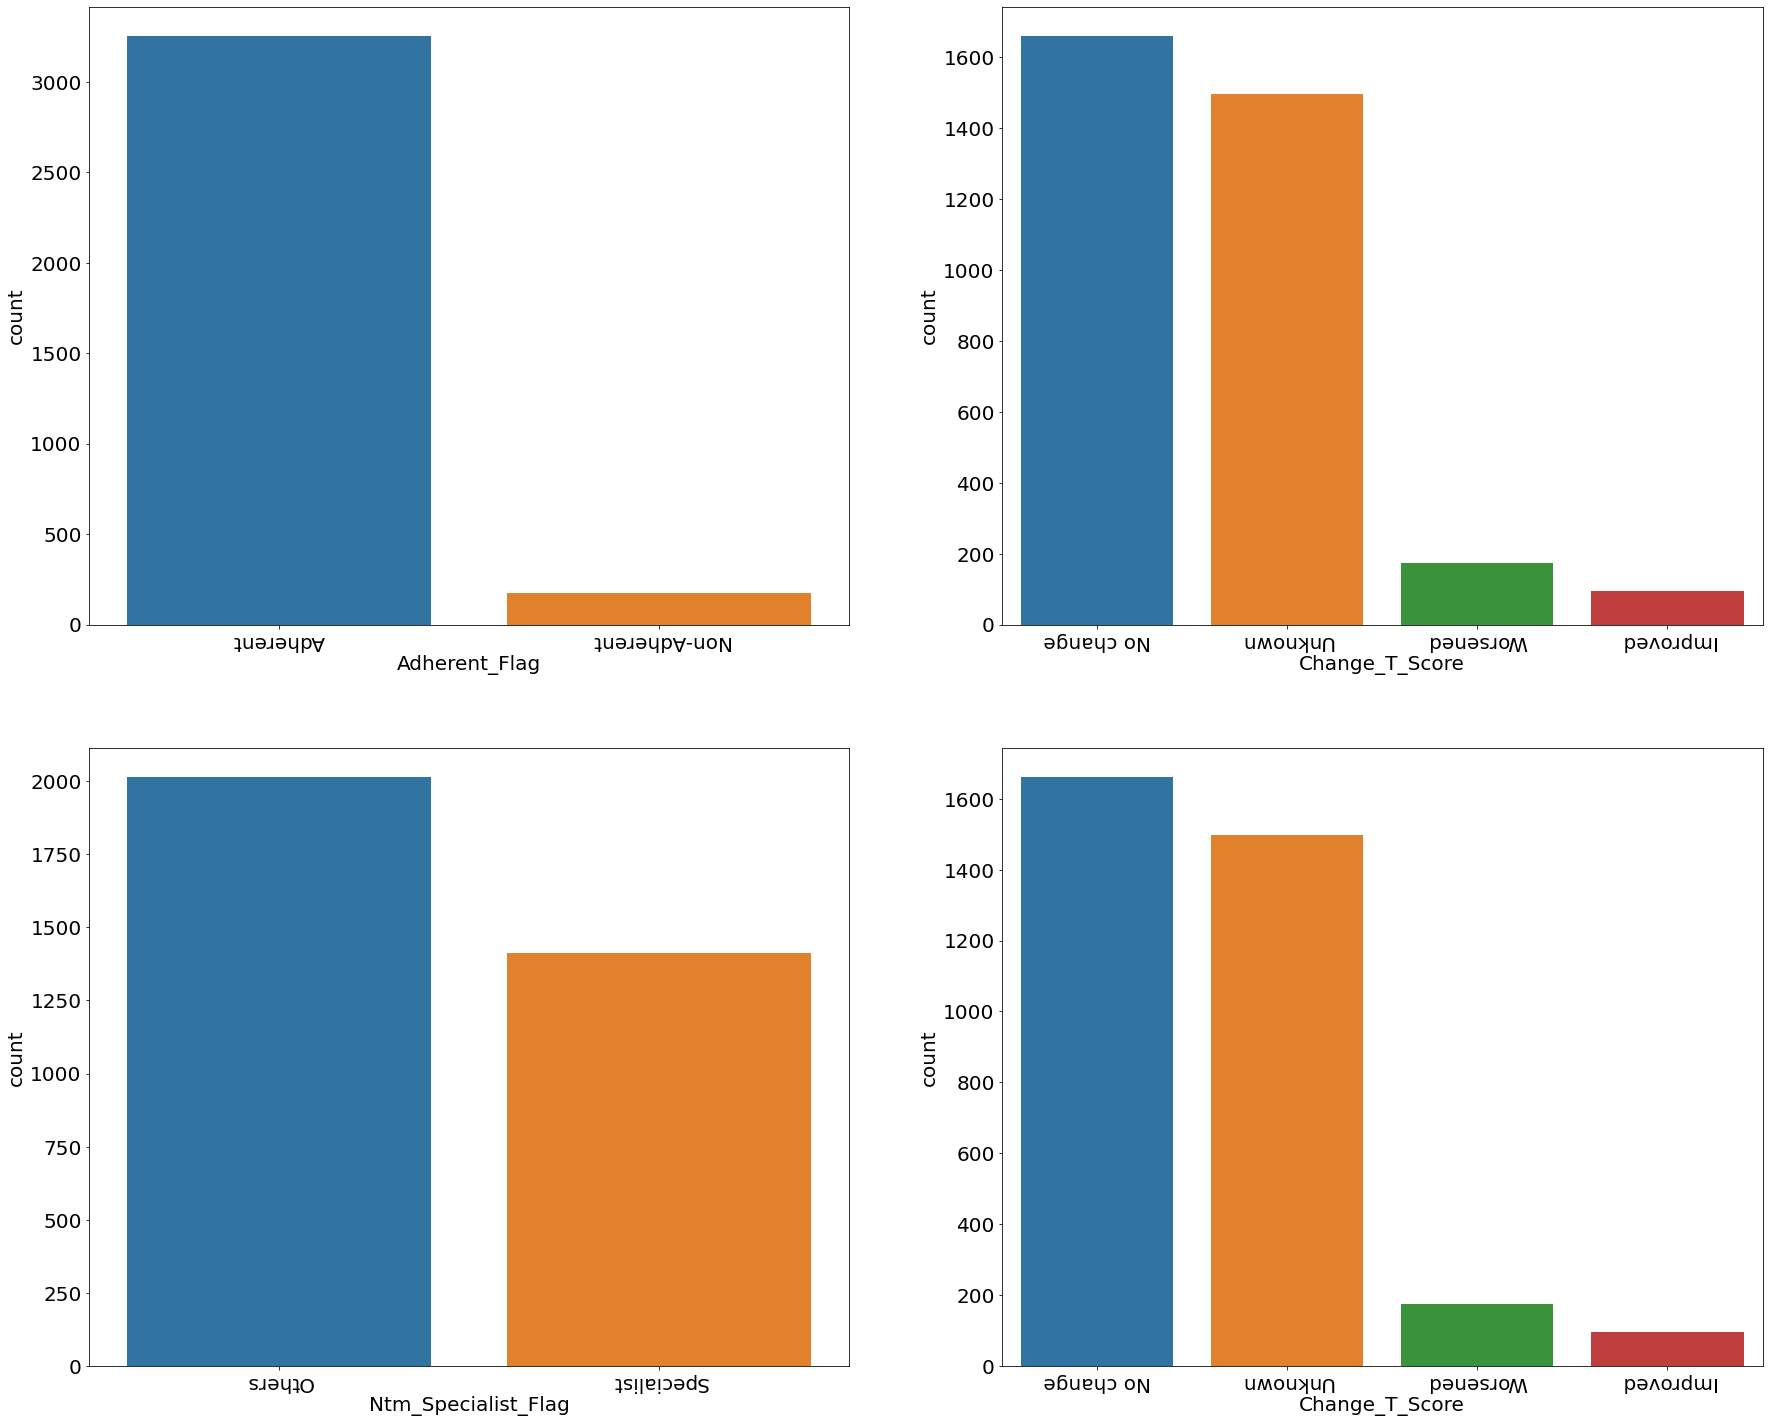

In [35]:
Categorical2 = ['Adherent_Flag','Change_T_Score','Ntm_Specialist_Flag','Change_T_Score']


fig, ax = plt.subplots(2, 2, figsize=(30,25))
for variable, subplot in zip(Categorical2, ax.flatten()):
    sns.countplot(dataset[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(180)


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


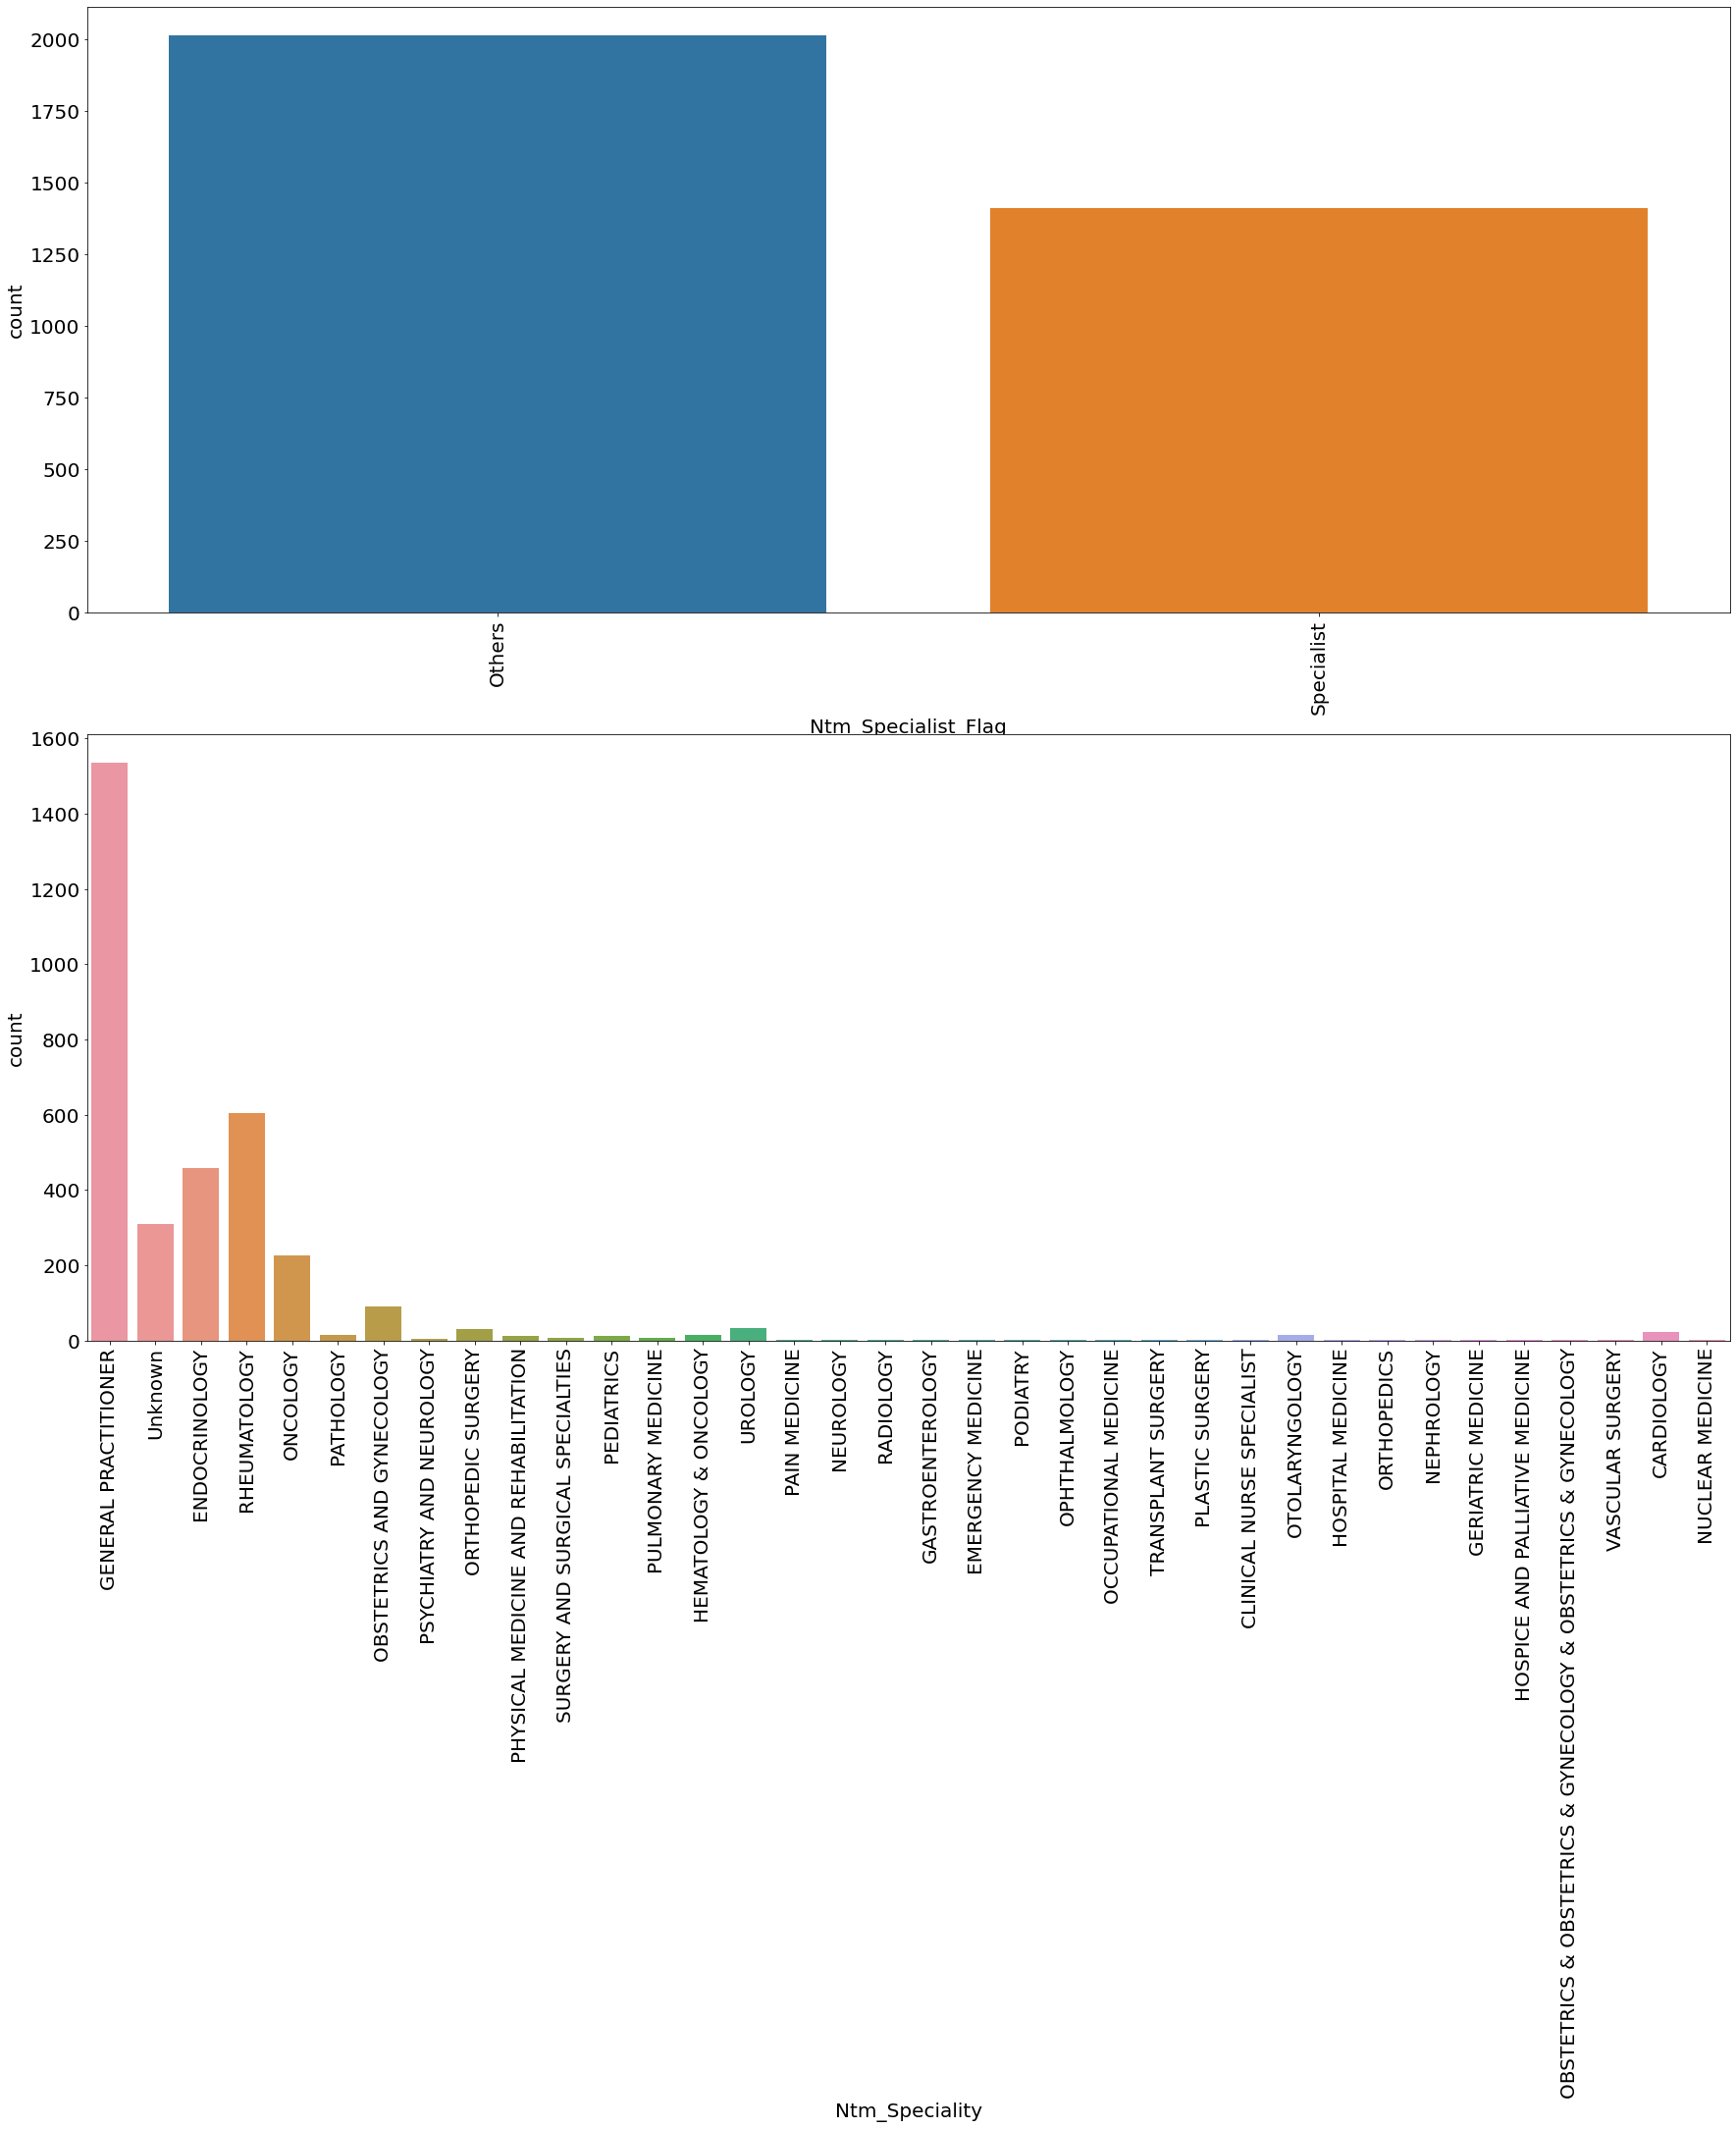

In [51]:
Categorical3 = ['Ntm_Specialist_Flag','Ntm_Speciality' ]

fig, ax = plt.subplots(2, 1, figsize=(30,25))
for variable, subplot in zip(Categorical3, ax.flatten()):
    sns.countplot(dataset[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

#these two columns does not seem to provide any valuable information regarding Persistency better to drop them

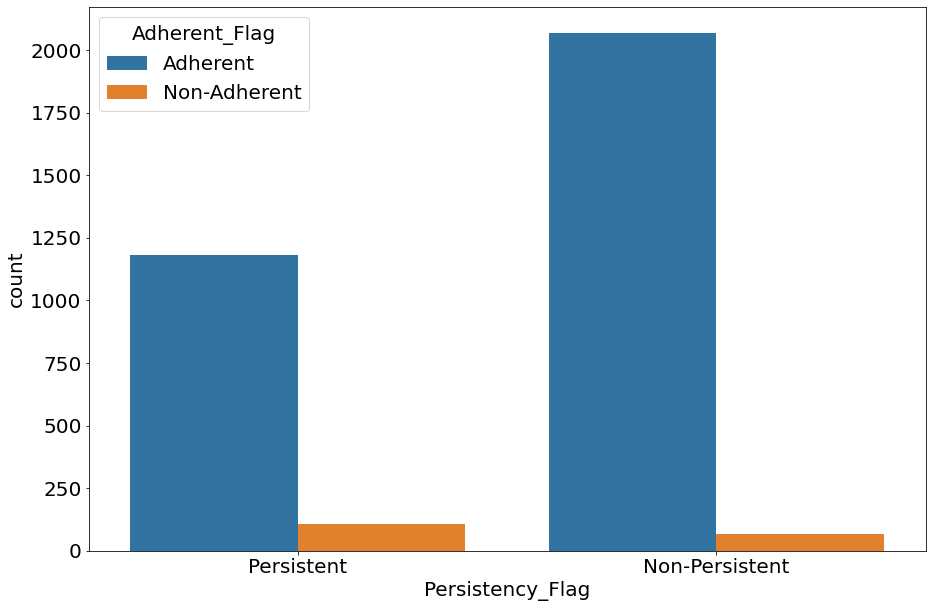

In [58]:
#examine relation between persistency with other factors : 
plt.figure(figsize=(15,10))
ax = sns.countplot(x="Persistency_Flag", hue="Adherent_Flag", data=dataset)

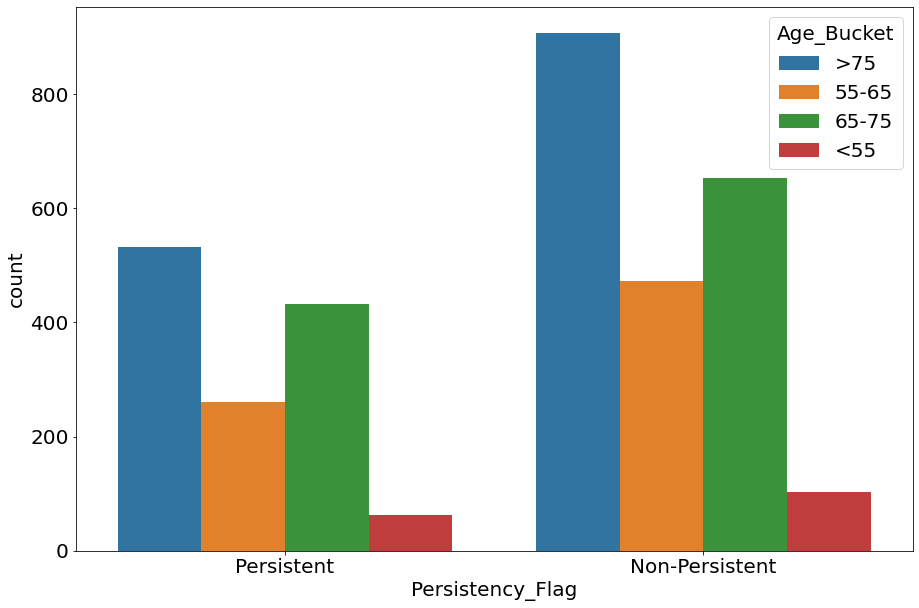

In [56]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x="Persistency_Flag", hue="Age_Bucket", data=dataset)

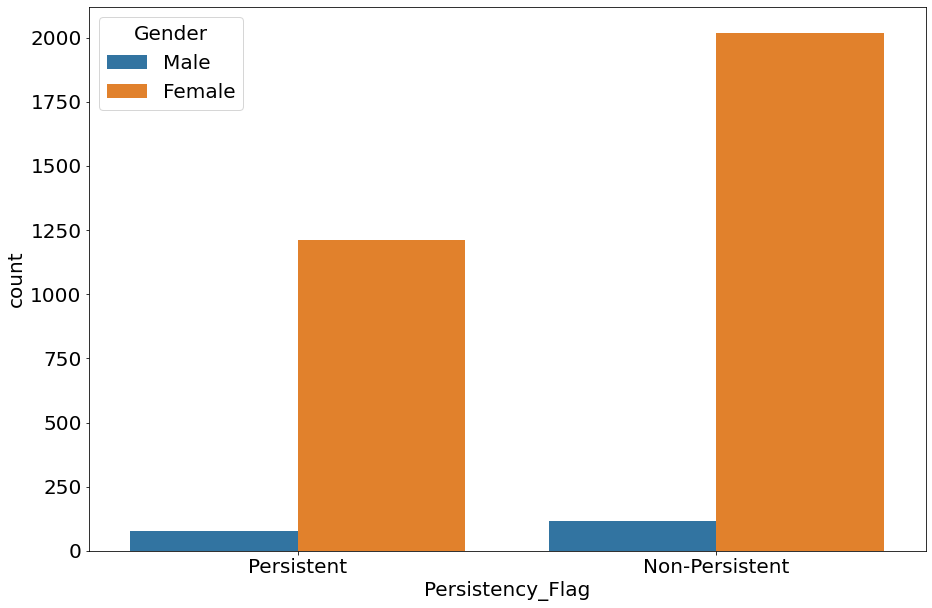

In [59]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x="Persistency_Flag", hue="Gender", data=dataset)

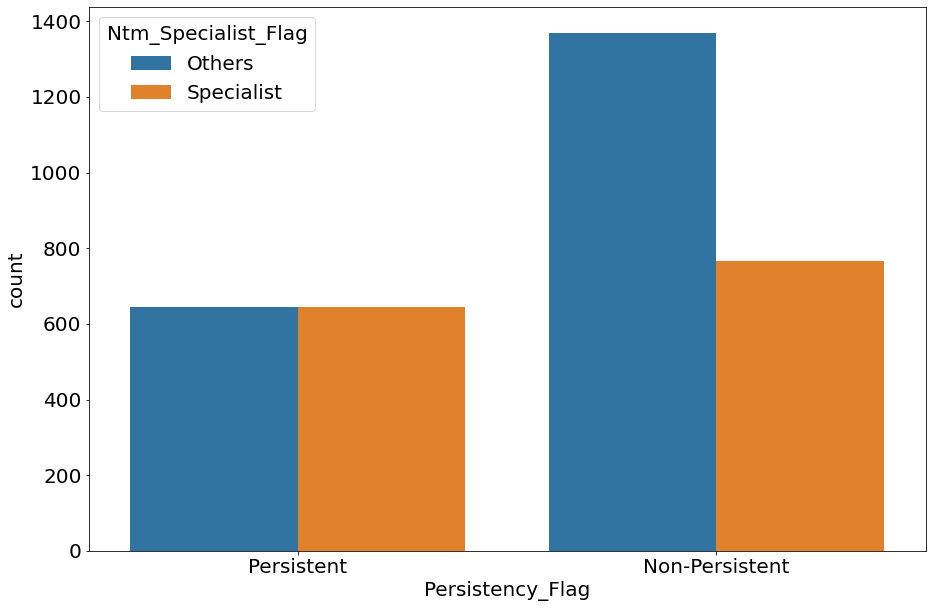

In [60]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x="Persistency_Flag", hue="Ntm_Specialist_Flag", data=dataset)
#this is interesting, meaning that Persistency has nothing to do with speciality so better to drop speciality columns

In [ ]:
#drop speciality column
#tasks to do
#examine the relation between persistency and other categorical factors to know if we need to drop them or keep them
#